# Analysis of OSM tags

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle
import json
import pandas as pd
import seaborn as sns
import plotly.express as px
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import lisa_cluster

from src import evaluation_functions as eval_func

%run ../settings/yaml_variables.py
%run ../settings/df_styler.py
%run ../settings/plotting.py
%run ../settings/load_osmdata.py
%run ../settings/paths.py


/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
<string>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
/Users/anev/Library/CloudStorage/Dropbox/ITU/repositories/bikedna_dk_analysis/settings/plotting.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases 

OSM data loaded successfully!


In [2]:
# Read intrinsic grid results
with open(
    f"../results/OSM/{study_area}/data/grid_results_intrinsic.pickle", "rb"
) as fp:
    osm_intrinsic_grid = pickle.load(fp)

osm_intrinsic_grid.dropna(subset='count_osm_edges',inplace=True)

# Import intrinsic results
osm_intrinsic_file = open(
    f"../results/OSM/{study_area}/data/intrinsic_analysis.json"
)

osm_intrinsic_results = json.load(osm_intrinsic_file)

# Import summary dataframe
summarize_results_df = pd.read_csv(f"../results/OSM/{study_area}/data/intrinsic_summary_results.csv",index_col=0)

summarize_results_df.style.pipe(format_osm_style)

## Spatial patterns in missing tags

In [3]:
rename_dict = {
    "existing_tags_surface_length_pct_missing":"surface_length_pct_missing",
    "existing_tags_width_length_pct_missing":"width_length_pct_missing",
    "existing_tags_speedlimit_length_pct_missing":"speedlimit_length_pct_missing",
    "existing_tags_lit_length_pct_missing":"lit_length_pct_missing",
    "existing_tags_surface_count_pct_missing":"surface_count_pct_missing",
    "existing_tags_width_count_pct_missing":"width_count_pct_missing",
    "existing_tags_speedlimit_count_pct_missing":"speedlimit_count_pct_missing",
    "existing_tags_lit_count_pct_missing":"lit_count_pct_missing",
    "existing_tags_surface_length_pct":"surface_length_pct",
    "existing_tags_width_length_pct":"width_length_pct",
    "existing_tags_speedlimit_length_pct":"speedlimit_length_pct",
    "existing_tags_lit_length_pct":"lit_length_pct",
    "existing_tags_surface_count_pct":"surface_count_pct",
    "existing_tags_width_count_pct":"width_count_pct",
    "existing_tags_speedlimit_count_pct":"speedlimit_count_pct",
    "existing_tags_lit_count_pct":"lit_count_pct"
}


osm_intrinsic_grid.rename(rename_dict,inplace=True,axis=1)

length_missing = [
    "surface_length_pct_missing",
    "width_length_pct_missing",
    "speedlimit_length_pct_missing",
    "lit_length_pct_missing"
]

count_missing = [
    "surface_count_pct_missing",
    "width_count_pct_missing",
    "speedlimit_count_pct_missing",
    "lit_count_pct_missing"
]

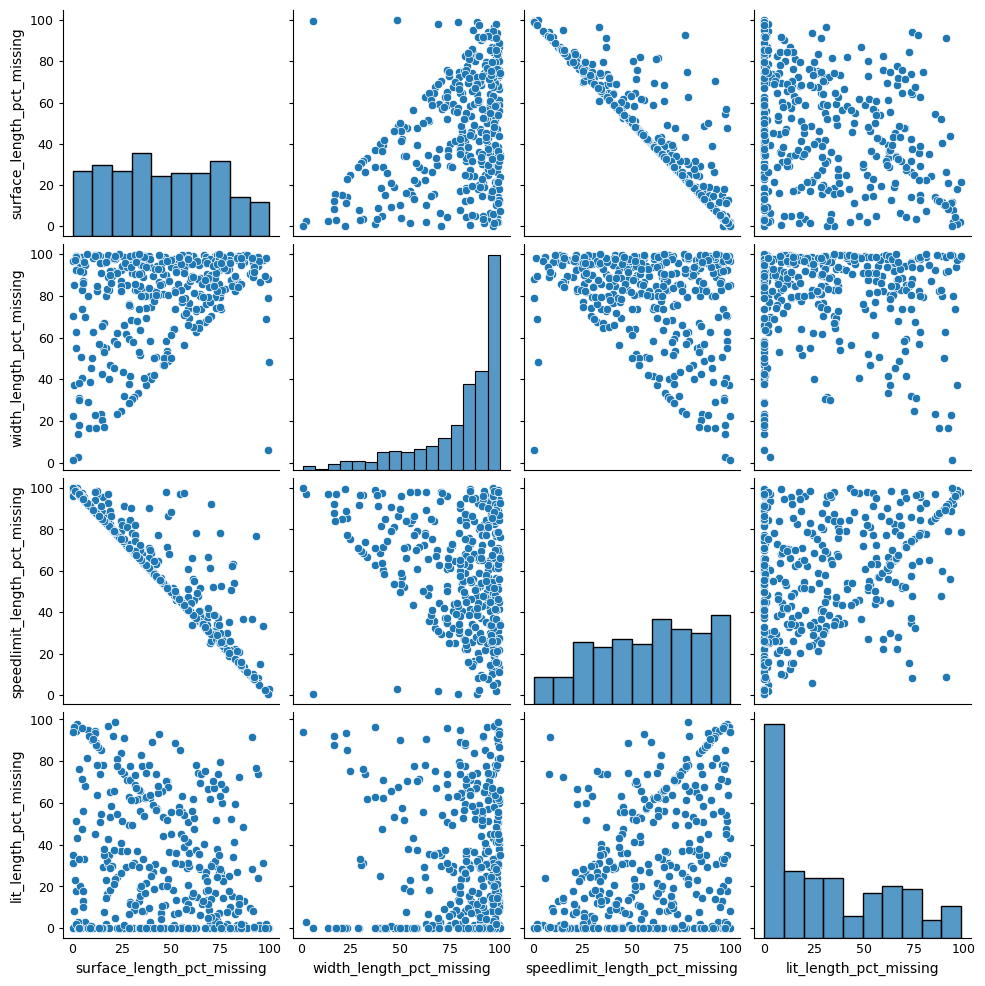

In [4]:
sns.pairplot(osm_intrinsic_grid[osm_intrinsic_grid[length_missing]<100][length_missing].dropna());

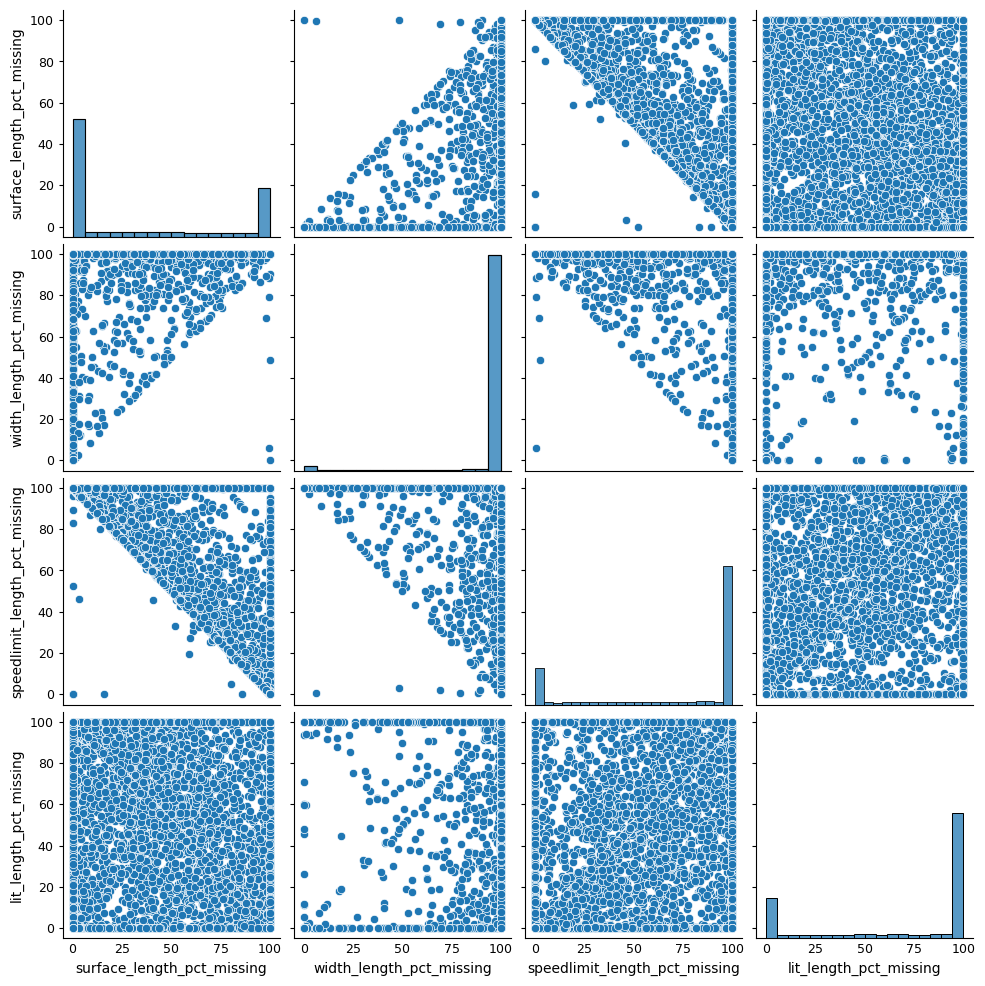

In [5]:
sns.pairplot(osm_intrinsic_grid[length_missing].dropna());

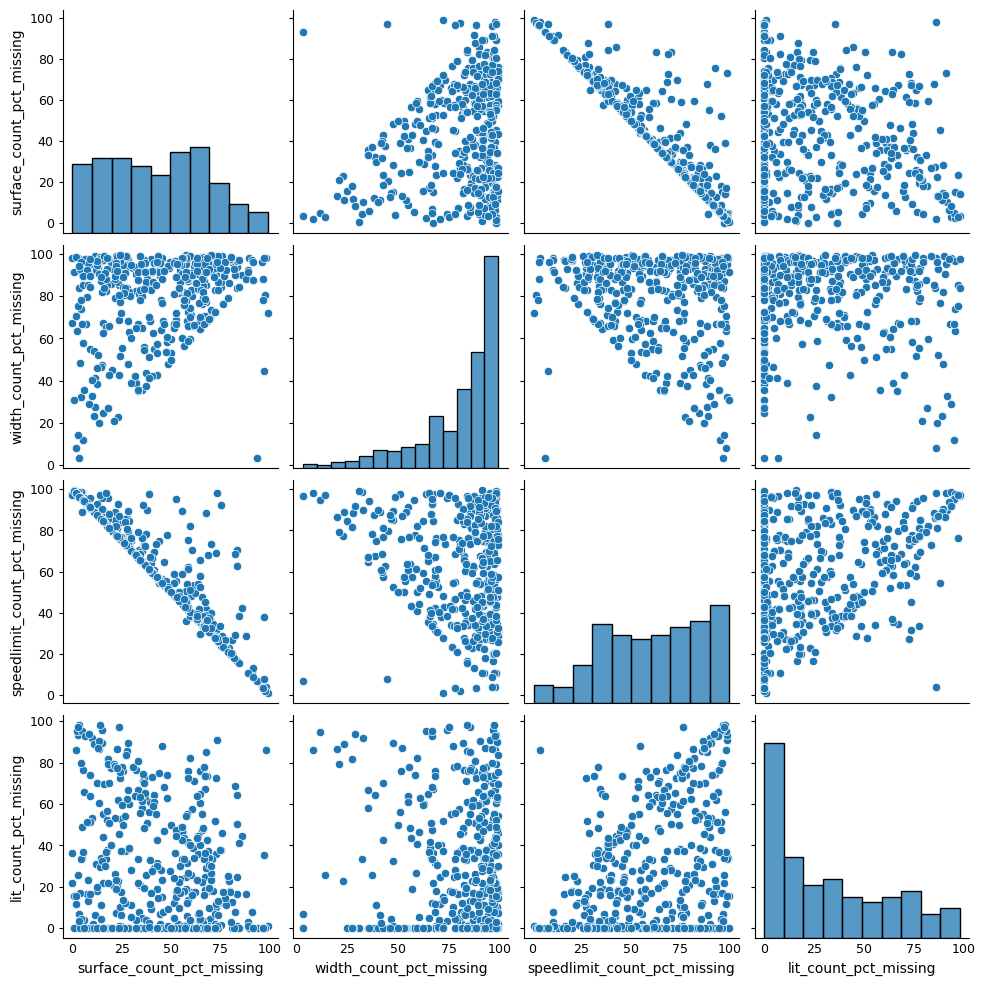

In [6]:
sns.pairplot(osm_intrinsic_grid[osm_intrinsic_grid[count_missing]<100][count_missing].dropna());

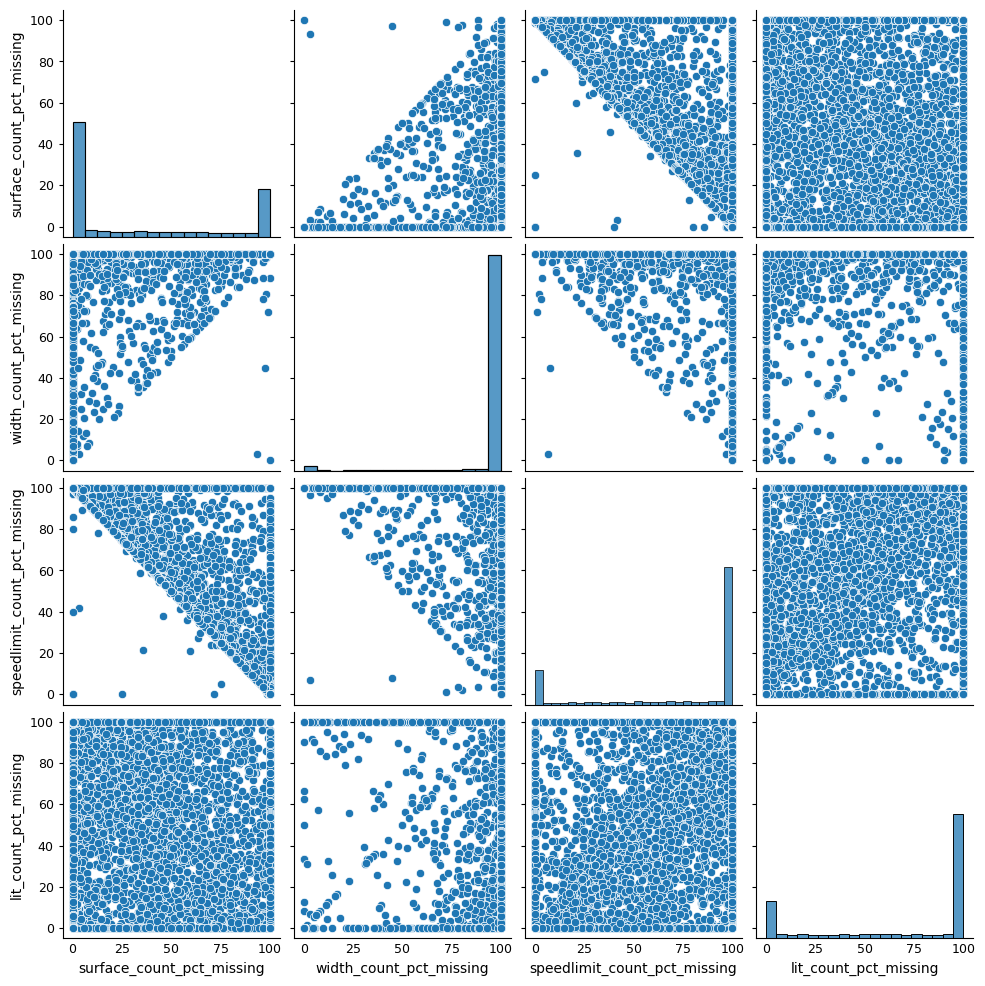

In [7]:
sns.pairplot(osm_intrinsic_grid[count_missing].dropna());

In [8]:

fig = px.scatter(
    osm_intrinsic_grid, 
    x='surface_count_pct_missing', 
    y='speedlimit_count_pct_missing',
    color="osm_edge_density",
    title='Correlation between missing tags', 
    color_continuous_scale='viridis_r',
    labels={
        "osm_edge_density": "edge density (m/sqkm)",
        "speedlimit_count_pct_missing": "Pct edges without speedlimit tag",
        "surface_count_pct_missing": "Pct edges without surface tag",
        })

fig.update_layout(
    font=dict(
        size=12,
        color="RebeccaPurple"
    )
)
fig.show()

In [9]:
fig = px.scatter(
    osm_intrinsic_grid, 
    x='surface_count_pct_missing', 
    y='lit_count_pct_missing',
    color="osm_edge_density",
    title='Correlation between missing tags', 
    color_continuous_scale='viridis_r',
    labels={
        "osm_edge_density": "edge density (m/sqkm)",
        "speedlimit_count_pct_missing": "Pct edges without speedlimit tag",
        "surface_count_pct_missing": "Pct edges without surface tag",
        })

fig.update_layout(
    font=dict(
        size=12,
        color="RebeccaPurple"
    )
)
fig.show()

In [10]:
# import os.path

# if os.path.isfile(osm_grid_spatial_weights_fp):

#     adj_list = pd.read_csv(osm_grid_spatial_weights_fp)

#     w = weights.W.from_adjlist(adj_list)

# else:
    
%run ../settings/create_osm_grid_spatial_weights.py

adj_list = pd.read_csv(osm_grid_spatial_weights_fp)

w = weights.W.from_adjlist(adj_list)

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning:

The weights matrix is not fully connected. There are 22 components



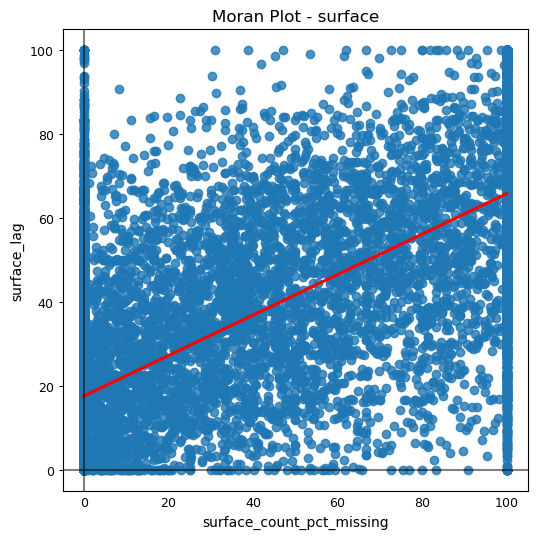

With significance 0.001, the Moran's I value for surface errors is 0.4816272515900808


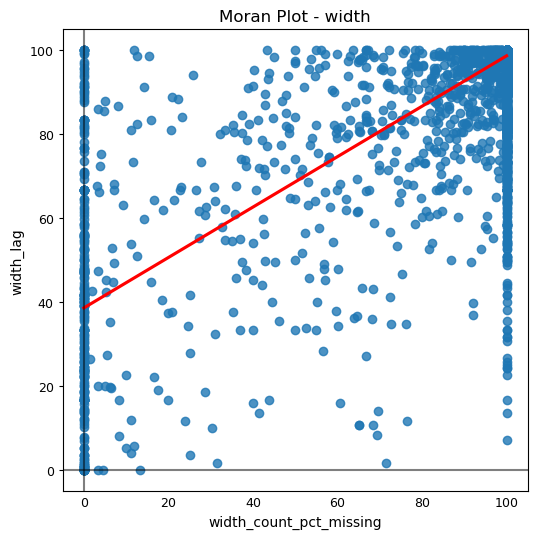

With significance 0.001, the Moran's I value for width errors is 0.6002374995644002


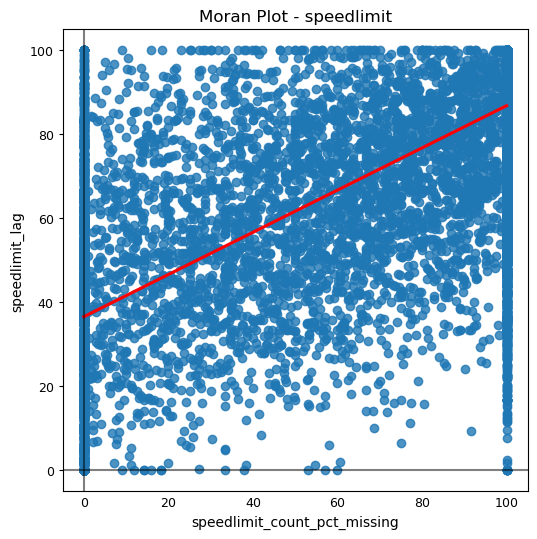

With significance 0.001, the Moran's I value for speedlimit errors is 0.5023745983389847


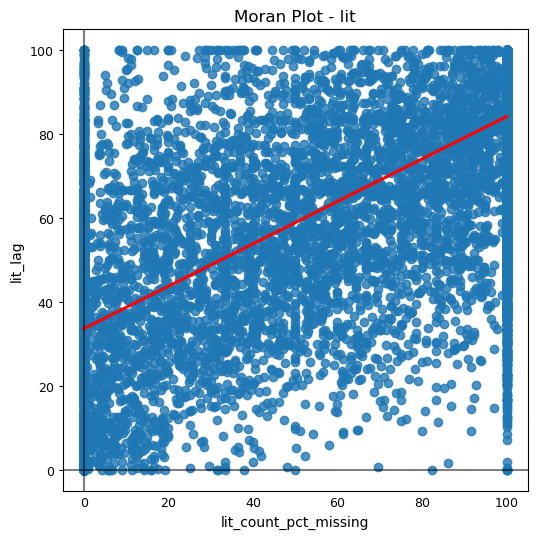

With significance 0.001, the Moran's I value for lit errors is 0.5050096132729295


In [11]:
tag_types = ['surface','width','speedlimit','lit']

for t, c in zip(tag_types,count_missing):

    # compute spatial lag
    osm_intrinsic_grid[f"{t}_lag"] = weights.spatial_lag.lag_spatial(
        w, osm_intrinsic_grid[c]
    )

    f, ax = plt.subplots(1, figsize=(6, 6))
    sns.regplot(
        x=c,
        y=f"{t}_lag",
        ci=None,
        data=osm_intrinsic_grid,
        line_kws={"color": "r"},
    )
    ax.axvline(0, c="k", alpha=0.5)
    ax.axhline(0, c="k", alpha=0.5)
    ax.set_title(f"Moran Plot - {t}")
    plt.show()

    moran = esda.moran.Moran(osm_intrinsic_grid[c], w)
    print(f"With significance {moran.p_sim}, the Moran's I value for {t} errors is {moran.I}" )


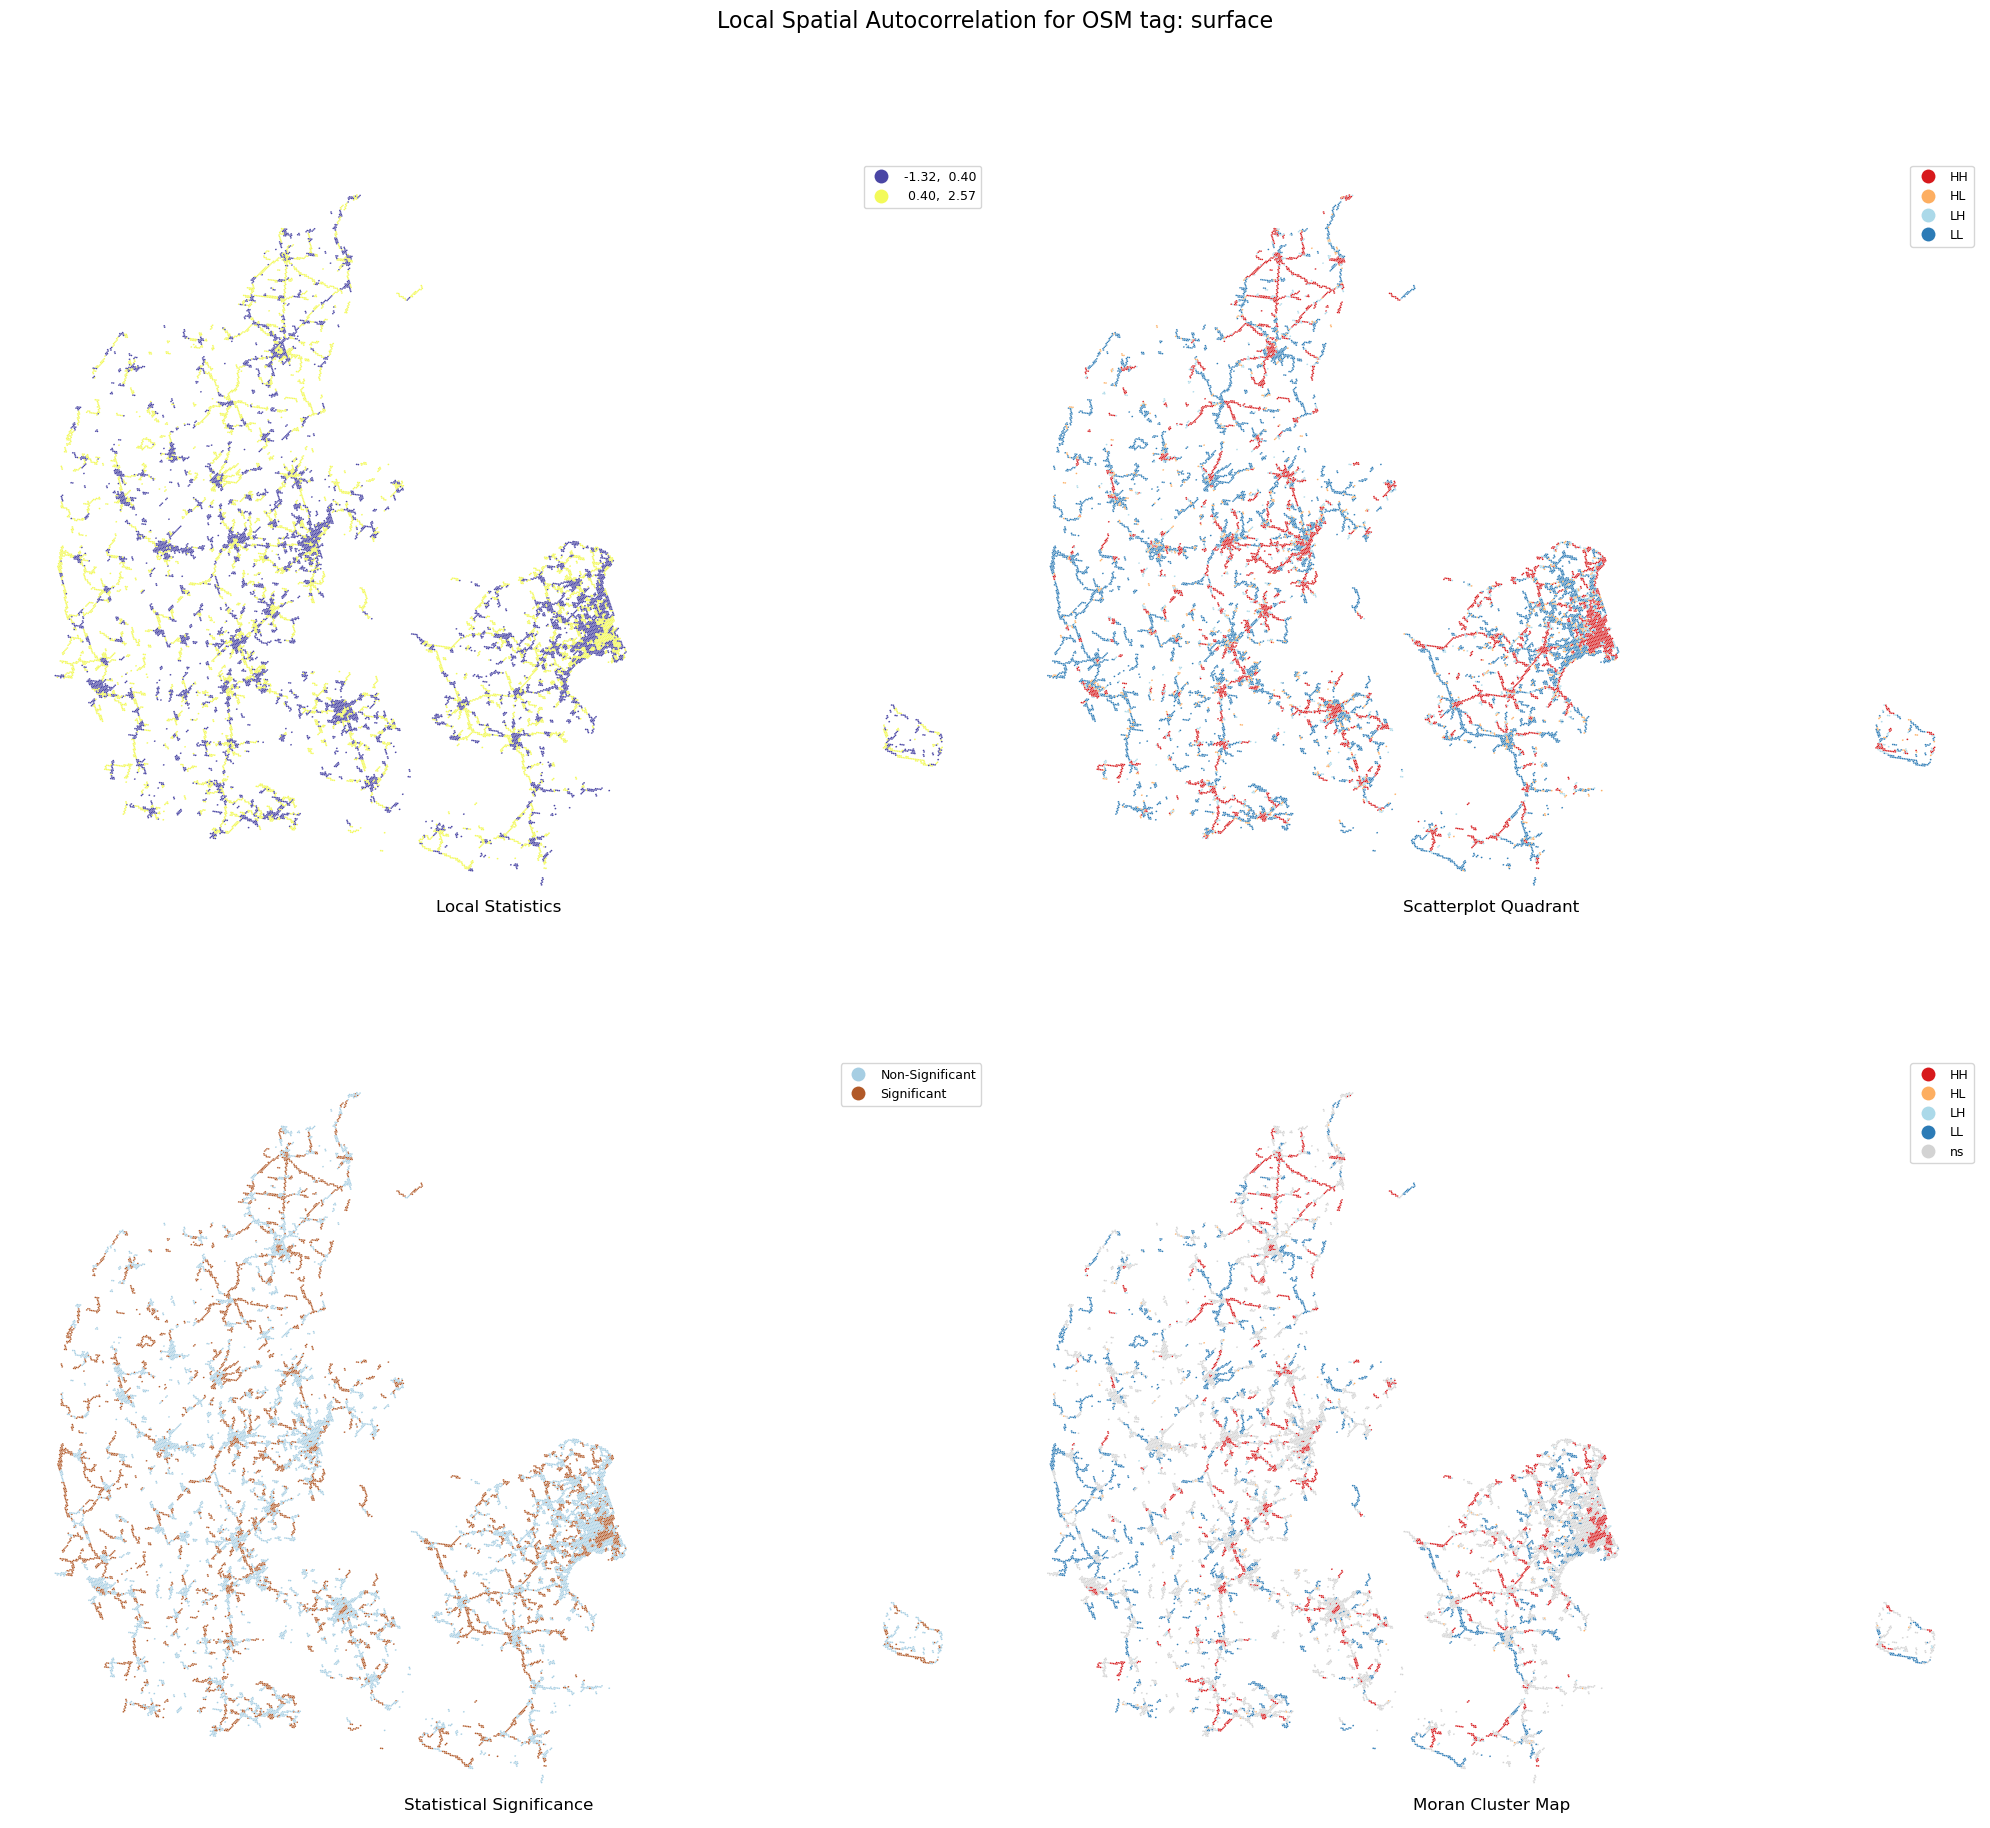

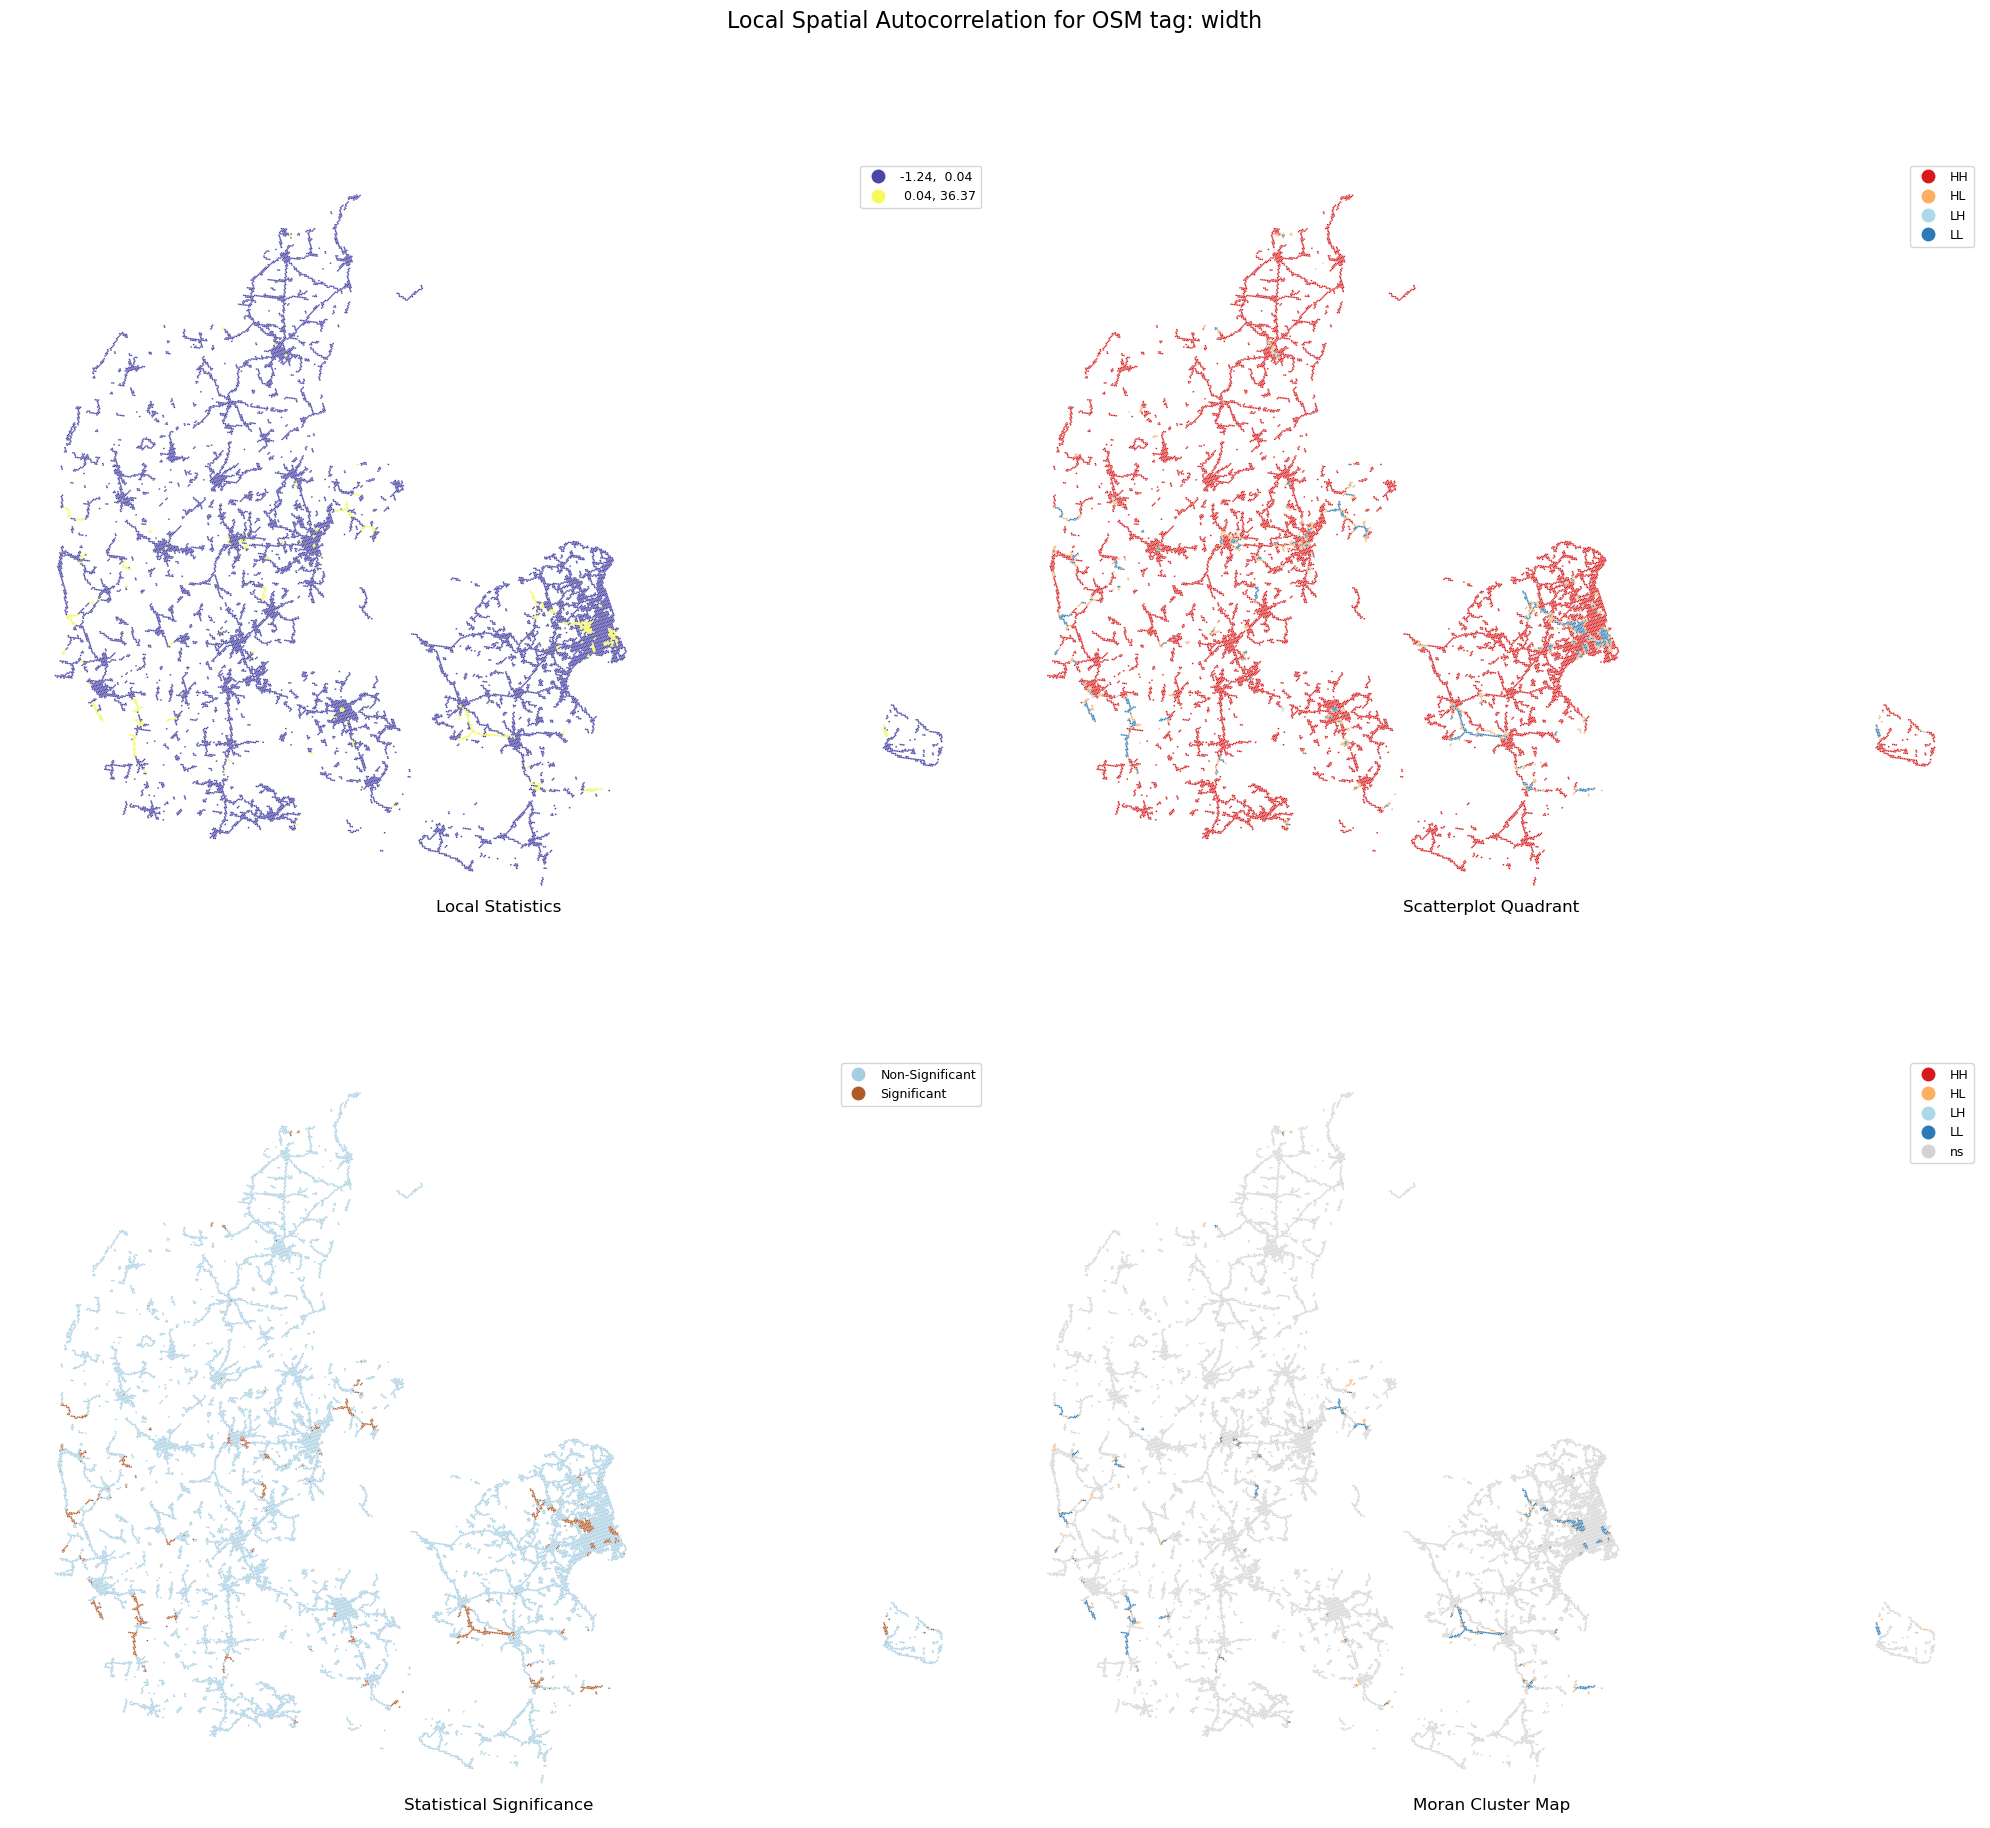

In [12]:
# based on https://geographicdata.science/book/notebooks/07_local_autocorrelation.html

significance_labels = {}

for t, c in zip(tag_types,count_missing):

    lisa = esda.moran.Moran_Local(osm_intrinsic_grid[c], w)

    sig = 1 * (lisa.p_sim < 0.05)

    spots = lisa.q * sig

    # Mapping from value to name (as a dict)
    spots_labels = {
        0: "Non-Significant",
        1: "HH",
        2: "LH",
        3: "LL",
        4: "HL",
    }
    osm_intrinsic_grid[f"{t}_q"] = pd.Series(
        spots,
        index=osm_intrinsic_grid.index
        ).map(spots_labels)

    f, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    axs = axs.flatten()

    ax = axs[0]

    osm_intrinsic_grid.assign(
        Is=lisa.Is
    ).plot(
        column="Is",
        cmap="plasma",
        scheme="quantiles",
        k=2,
        edgecolor="white",
        linewidth=0.1,
        alpha=0.75,
        legend=True,
        ax=ax,
    )

    ax = axs[1]

    lisa_cluster(lisa, osm_intrinsic_grid, p=1, ax=ax)

    ax = axs[2]
    labels = pd.Series(
        1 * (lisa.p_sim < 0.05), 
        index=osm_intrinsic_grid.index  
    ).map({1: "Significant", 0: "Non-Significant"})
    osm_intrinsic_grid.assign(
        cl=labels
    ).plot(
        column="cl",
        categorical=True,
        k=2,
        cmap="Paired",
        linewidth=0.1,
        edgecolor="white",
        legend=True,
        ax=ax,
    )

    significance_labels[t] = labels

    ax = axs[3]
    lisa_cluster(lisa, osm_intrinsic_grid, p=0.05, ax=ax)

    for i, ax in enumerate(axs.flatten()):
        ax.set_axis_off()
        ax.set_title(
            [
                "Local Statistics",
                "Scatterplot Quadrant",
                "Statistical Significance",
                "Moran Cluster Map",
            ][i],
            y=0,
        )

    f.suptitle(f'Local Spatial Autocorrelation for OSM tag: {t}', fontsize=16)

    f.tight_layout()

    plt.show()

In [ ]:
for t in tag_types:
    hotspot = len(osm_intrinsic_grid[osm_intrinsic_grid[f"{t}_q"]=="HH"])
    coldspot = len(osm_intrinsic_grid[osm_intrinsic_grid[f"{t}_q"]=="LL"])

    print(f"For the tag '{t}', {hotspot} out of {len(osm_intrinsic_grid)} grid cells ({hotspot/len(osm_intrinsic_grid)*100:.2f}%) are part of a hotspot.")
    print(f"For the tag '{t}', {coldspot} out of {len(osm_intrinsic_grid)} grid cells ({coldspot/len(osm_intrinsic_grid)*100:.2f}%) are part of a coldspot.")
    print("\n")

For the tag 'surface', 2332 out of 14480 grid cells (16.10%) are part of a hotspot.
For the tag 'surface', 3367 out of 14480 grid cells (23.25%) are part of a coldspot.


For the tag 'width', 1 out of 14480 grid cells (0.01%) are part of a hotspot.
For the tag 'width', 541 out of 14480 grid cells (3.74%) are part of a coldspot.


For the tag 'speedlimit', 3004 out of 14480 grid cells (20.75%) are part of a hotspot.
For the tag 'speedlimit', 2168 out of 14480 grid cells (14.97%) are part of a coldspot.


For the tag 'lit', 3568 out of 14480 grid cells (24.64%) are part of a hotspot.
For the tag 'lit', 2398 out of 14480 grid cells (16.56%) are part of a coldspot.




In [ ]:
# Export
q_cols = [t+'_q' for t in tag_types]
osm_intrinsic_grid[q_cols].to_csv("../results/osm_quality/tags_spatial_autocorrelation.csv",index=True)

## Correlation between missing tags & population density

In [ ]:
pop_grid = gpd.read_parquet(pop_processed_fp + "h3_population_polygons.parquet")

joined_grid = osm_intrinsic_grid.merge(pop_grid[['hex_id','pop_dens']],on="hex_id",how="inner")

assert len(joined_grid) == len(osm_intrinsic_grid)

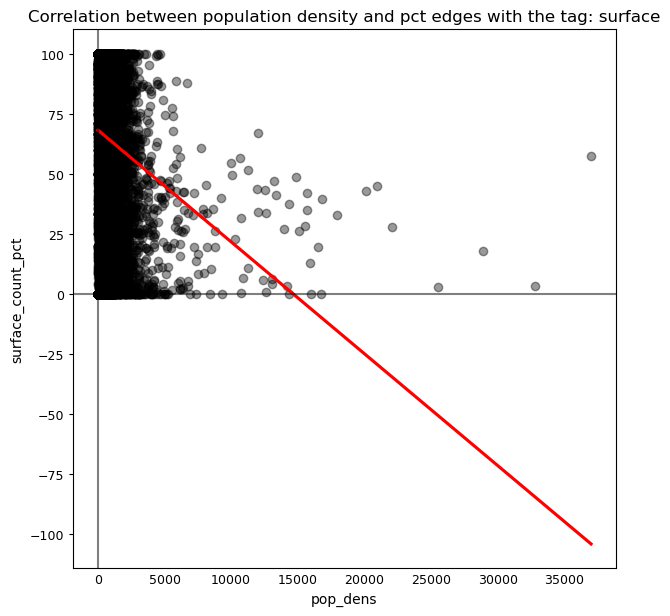

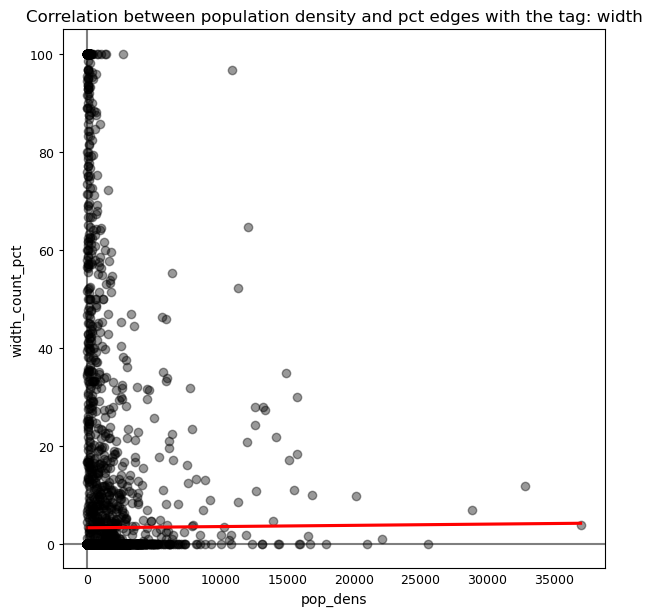

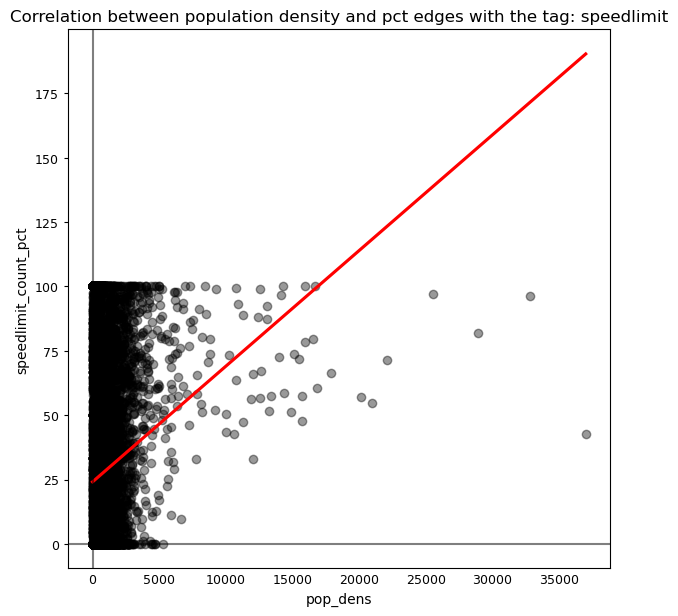

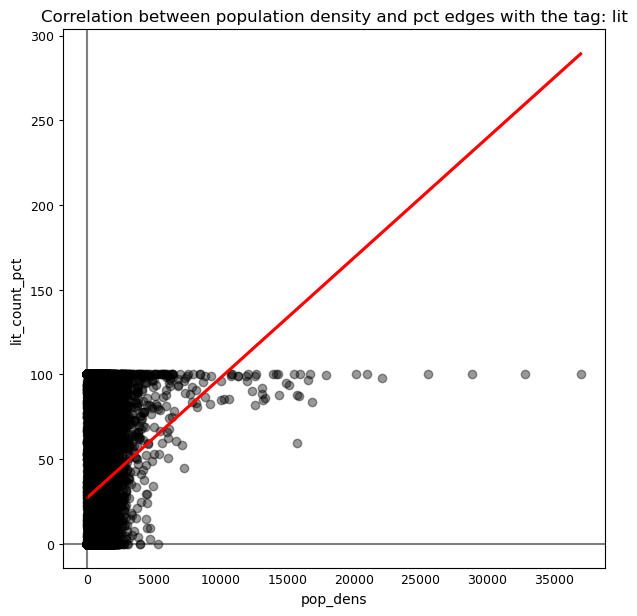

In [ ]:
tag_types = ["surface", "width", "speedlimit", "lit"]

length_cols = [
    "surface_length_pct",
    "width_length_pct",
    "speedlimit_length_pct",
    "lit_length_pct",
]

count_cols = [
    "surface_count_pct",
    "width_count_pct",
    "speedlimit_count_pct",
    "lit_count_pct",
]

for i, t in enumerate(tag_types):
    f, ax = plt.subplots(1, figsize=(7,7))

    sns.regplot(
        x="pop_dens",
        y=count_cols[i],
        ci=None,
        data=joined_grid,
        line_kws={"color": "r"},
        scatter_kws={"alpha": 0.4},
        color="black",
    )

    ax.axvline(0, c="k", alpha=0.5)
    ax.axhline(0, c="k", alpha=0.5)
    ax.set_title(f"Correlation between population density and pct edges with the tag: {t}")
    plt.show()

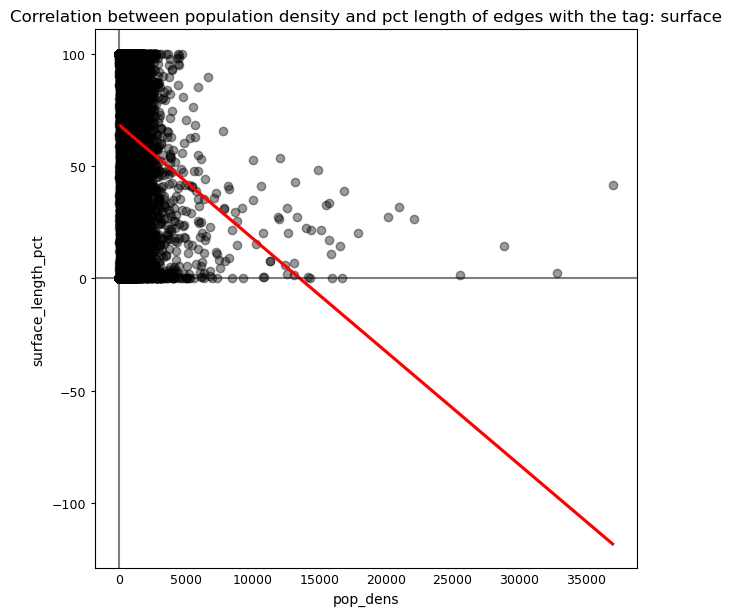

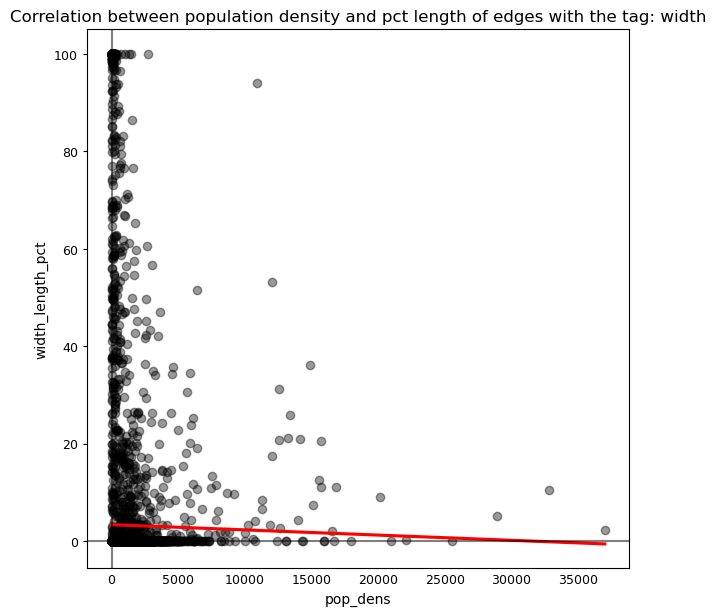

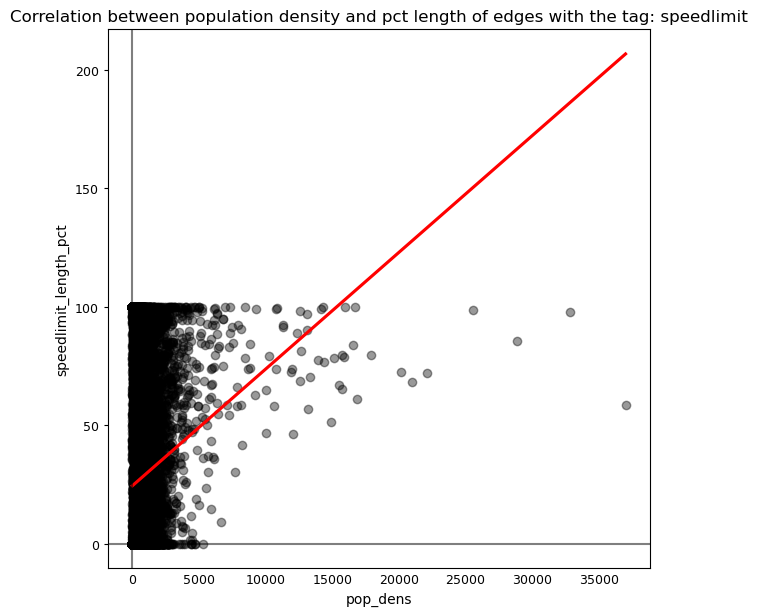

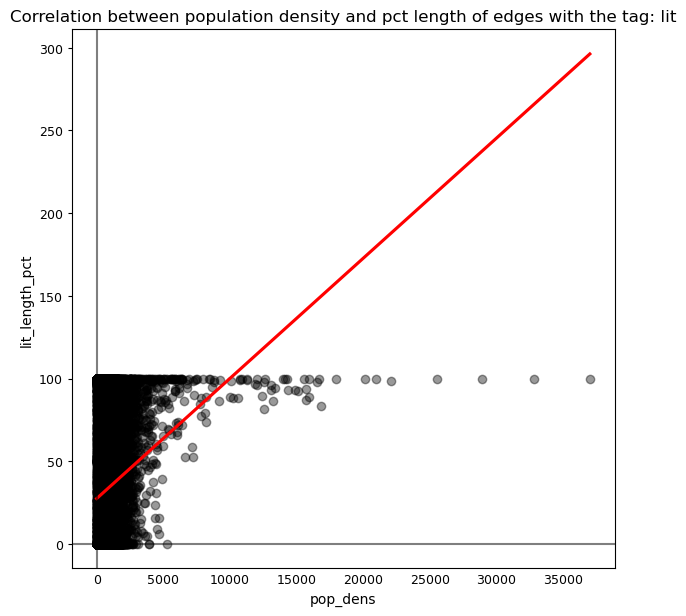

In [ ]:

for i, t in enumerate(tag_types):
    f, ax = plt.subplots(1, figsize=(7,7))

    sns.regplot(
        x="pop_dens",
        y=length_cols[i],
        ci=None,
        data=joined_grid,
        line_kws={"color": "r"},
        scatter_kws={"alpha": 0.4},
        color="black",
    )

    ax.axvline(0, c="k", alpha=0.5)
    ax.axhline(0, c="k", alpha=0.5)
    ax.set_title(f"Correlation between population density and pct length of edges with the tag: {t}")
    plt.show()